# Pymaceuticals Inc.
---
### Introduction
We aggregated two seets of data from the lab:<br>
`Study_results.csv` contains mouse id, timepoint, tumor volume, and metastatic sites.<br>
`Mouse_metadata.csv` contains mouse id, drug regimen, sex, age, and weight.<br>
The study group by drug regimen explored at the lab are: <br>
$Capomulin$, $Ceftamin$, $Infubinol$, $Ketapril$, $Naftisol$, $Propriva$, $Ramicane$, $Stelasyn$, $Zoniferol$ with *Placebo* as the control group.<br>
The controlled variable was initial tumor size, so all mice have a tumor volume of $45mm^3$ at timepoint $0 days$, and mice were monitored for up to $45 days$, with some mice expiring before that time.<br>
Most drug regimens have sample size of $25$, with $Propriva$ and $Stelasyn$ having a sample size of $24$. While cleaning the data, we noticed a duplicate entry for a particular mouse and timpoint with different tumor volumes and had to remove both entries from the datat set, so it is likely that all drug regimens started with a sample size of $25$.<br>
The median timepoint for $Capomulin$, $Ceftamin$, $Ketapril$, $Naftisol$, $Ramicane$, $Stelasyn$ is $20 days$, and the median timpoint for $Infubinol$, $Propriva$, $Zoniferol$, and the *Placebo* is $15 days$.<br>

---
### Analysis
#### Summary Statistics
We first looked at the summary statistics by drug regimen, and looked at mean, median, variance, standard deviation, and SEM of the tumor volume.<br>
Looking at the chart, there are two drugs $Capomulin$ and $Ramicane$ of note with means and medians below the initial $45mm^3$ ($40.68mm^3, 41.6mm^3$ and $40.22mm^3,	40.67mm^3$ respectively), indicating that these two may be effective drugs to treat the cancer. The other drugs have similar results as the *Placebo* which has a mean of $54.03mm^3$ and median of $52.29mm^3$, with means and medians of the other drugs falling within $1.5mm^3$ of the *Placebo*.
#### Bar and Pie Charts
**Bar Chart:** The bar chart corroborates the the summary statistics, as there is more observed timepoints for the two drugs $Capomulin$ and $Ramicane$. An anomaly is that $Propriva$ which has significantly less observed timepoints, perhaps due to the data entry error.<br>
**Pie Chart:** The pie chart show the percentage of the population based on sex with $51%$ being male, and $49%$ being female, which is relatively even distributioin of gender to prevent a gender bias.
#### Quartiles, Outliers and Boxplots


 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [39]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [40]:
# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [41]:
# Checking the number of mice.
mouse_study_df['Mouse ID'].nunique()

249

In [42]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_df[mouse_study_df['Mouse ID'] != 'g989'].reset_index(drop=True)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [45]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of the tumor volume for each drug regimen
# Use groupby and summary statistical methods to calculate the following properties: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_summary = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

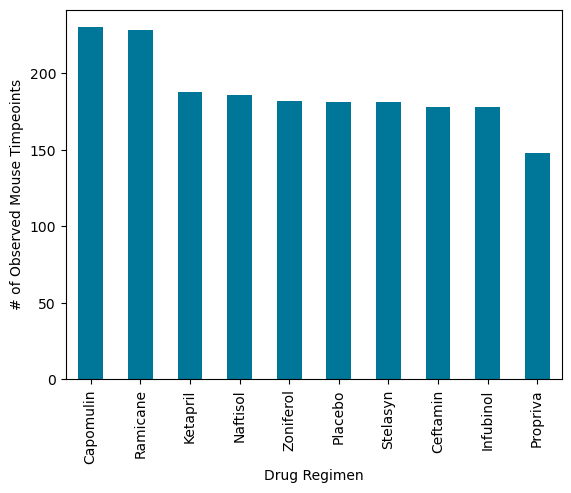

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = regimen_summary.count().sort_values(ascending=False)
regimen_counts.plot.bar(color='#007799', ylabel='# of Observed Mouse Timpeoints')
plt.show()

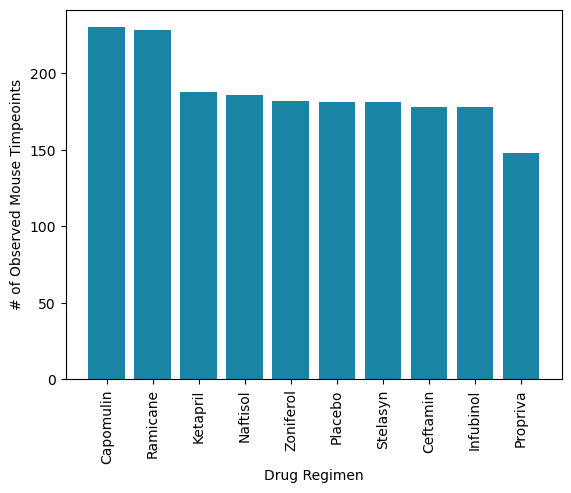

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = [1,2,3,4,5,6,7,8,9,10]
plt.bar(x_axis, regimen_counts, color='#007799', alpha=0.9, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_counts.index, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timpeoints')
plt.show()

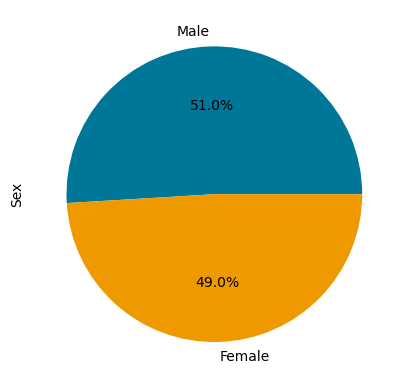

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df.groupby('Sex')['Mouse ID'].count().sort_values(ascending=False)
sex_counts.plot.pie(ylabel='Sex', autopct="%1.1f%%", colors=['#007799','#ee9900'])
plt.show()

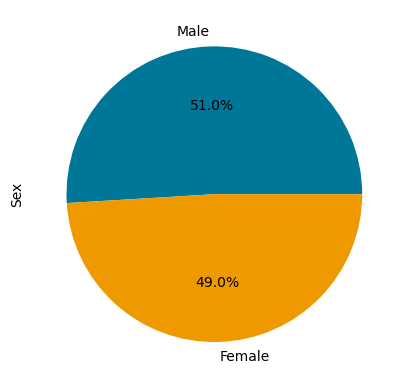

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts.values, labels=sex_counts.index, colors=['#007799','#ee9900'], autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
final_tumor_vol = pd.Series(data=[clean_df.loc[(clean_df['Mouse ID'] == i) & (clean_df['Timepoint'] == max_timepoint[i]),
                                  'Tumor Volume (mm3)'].values[0] for i in max_timepoint.index],
                            index=max_timepoint.index,
                            name='Final Tumor Volume (mm3)')
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(clean_df,final_tumor_vol, how="left", on=["Mouse ID", "Mouse ID"])

In [71]:
# Put treatments into a list for for loop (and later for plot labels)
# treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments = clean_df['Drug Regimen'].unique()
# Locate the rows which contain mice on each drug and get the tumor volumes, add subset
treatments_data = pd.Series(data=[final_tumor_df[final_tumor_df['Drug Regimen'] == drug].groupby('Mouse ID')['Final Tumor Volume (mm3)'].mean() 
                                     for drug in treatments],
                               index=treatments,
                               name='Final Tumor Volume (mm3) by Treatment')
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    # Determine outliers using upper and lower bounds
    quartiles = treatments_data[drug].quantile([.25,.5,.75])
    low_bd = quartiles[0.25] - 1.5*(quartiles[0.75]-quartiles[0.25])
    upp_bd = quartiles[0.75] + 1.5*(quartiles[0.75]-quartiles[0.25])
    print(f"{drug}'s potential outliers: {treatments_data[drug][lambda x: (x<low_bd)|(x>upp_bd)]}")

Capomulin's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ketapril's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Naftisol's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Mouse ID
c326    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
Stelasyn's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Zoniferol's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Propriva's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Placebo's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


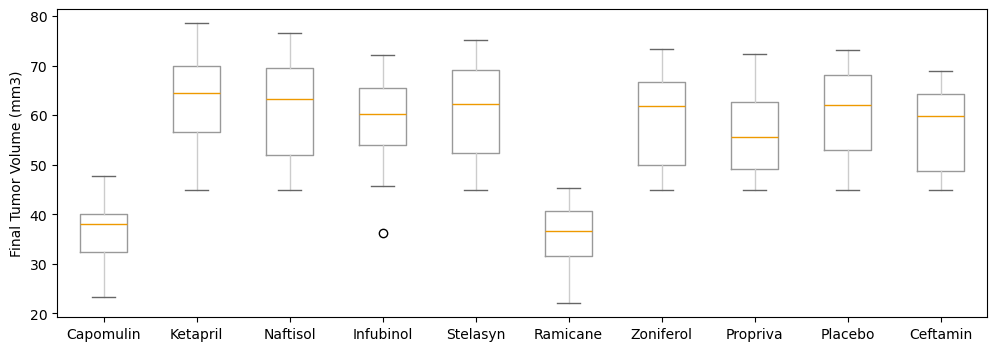

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments_df = pd.DataFrame(data=[treatments_data[x].values for x in treatments], index = treatments).transpose()
treatments_df.boxplot(ylabel='Final Tumor Volume (mm3)', grid=False, figsize=(12,4),
                      color = dict(boxes='#999', whiskers='#ccc', medians='#ee9900', caps='#666'))
plt.show()

## Line and Scatter Plots

In [25]:
clean_df.groupby('Drug Regimen')['Mouse ID'].unique()

Drug Regimen
Capomulin    [b128, j246, r554, s185, b742, x401, l509, s71...
Ceftamin     [x822, l558, l733, f436, l490, b759, l471, y86...
Infubinol    [c326, c139, v339, a577, y163, k483, k804, o80...
Ketapril     [f932, g107, a457, c819, h246, p189, n923, q11...
Naftisol     [f993, z234, b559, x930, o725, z969, v835, r60...
Placebo      [a897, j235, q787, a262, r850, i669, n763, s15...
Propriva     [n630, w350, p310, a699, k603, n482, t198, l21...
Ramicane     [c458, q610, j913, a411, a444, d251, j989, y44...
Stelasyn     [f234, x402, a492, w540, v764, s565, a366, p38...
Zoniferol    [f394, c264, n967, f545, k894, k754, g296, d16...
Name: Mouse ID, dtype: object

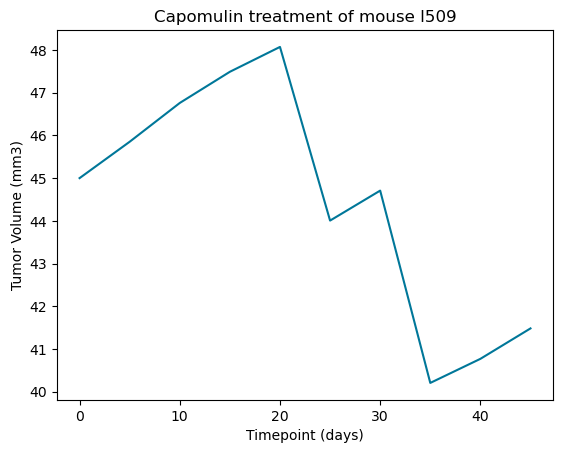

In [32]:
id = 'l509'
drug = clean_df[(clean_df["Mouse ID"]==id)&(clean_df["Timepoint"]==0)]["Drug Regimen"].values[0]
clean_df[clean_df['Mouse ID']==id].plot(x='Timepoint',y='Tumor Volume (mm3)',
                                        xlabel='Timepoint (days)',ylabel='Tumor Volume (mm3)',
                                        color='#007799',legend=False,
                                        title=f'{drug} treatment of mouse {id}')
plt.show()

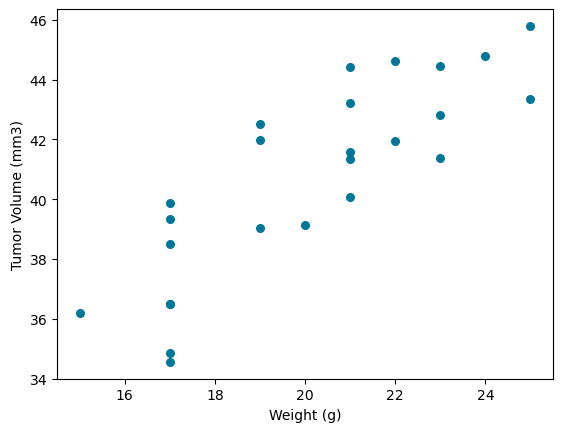

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug_data=clean_df[clean_df['Drug Regimen']==drug].groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()
drug_data.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)',s=30,color="#007799")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


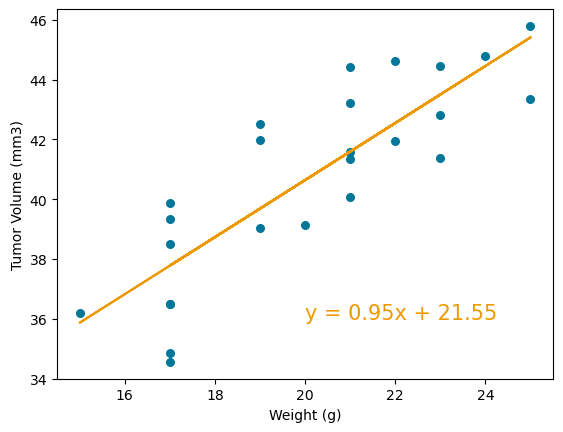

In [34]:
# Calculate the correlation coefficient and a linear regression mode
correlation = st.pearsonr(drug_data['Weight (g)'], drug_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
m, b, r, p, std_err = st.linregress(drug_data['Weight (g)'], drug_data['Tumor Volume (mm3)'])
lin_reg = m*drug_data['Weight (g)']+b
lin_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
drug_data.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)',s=30,color="#007799")
plt.plot(drug_data['Weight (g)'],lin_reg,"#ee9900")
plt.annotate(lin_eq,(20,36),fontsize=15,color="#ee9900")
plt.show()